In [6]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data_test = pd.read_csv("/content/drive/MyDrive/Capbl_project/test.csv")
trainingData = pd.read_csv("/content/drive/MyDrive/Capbl_project/train.csv")

Train dataset is shown below:
          id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N    

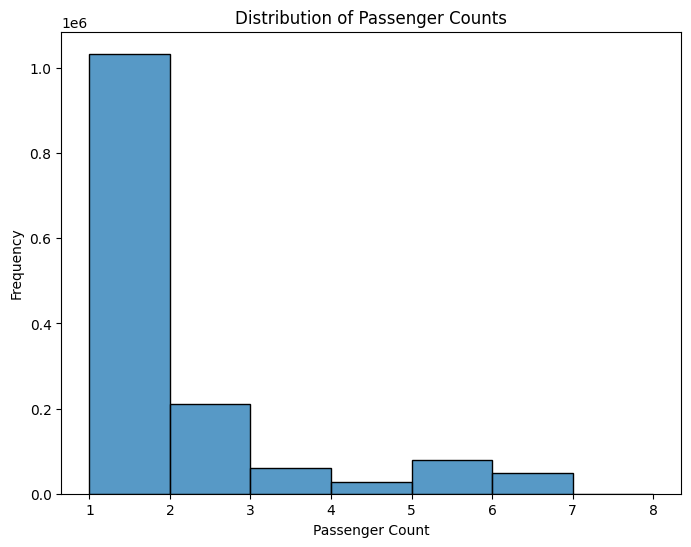


Missing values in the train dataset is shown below:
id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

Missing values in the test dataset is shown below:
id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64


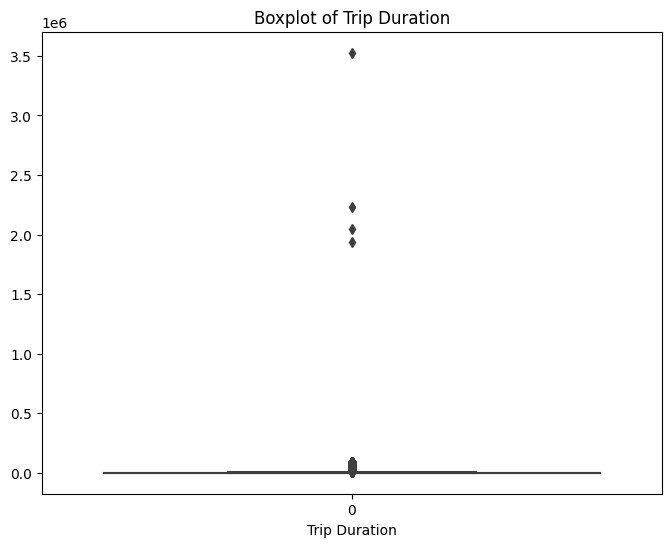

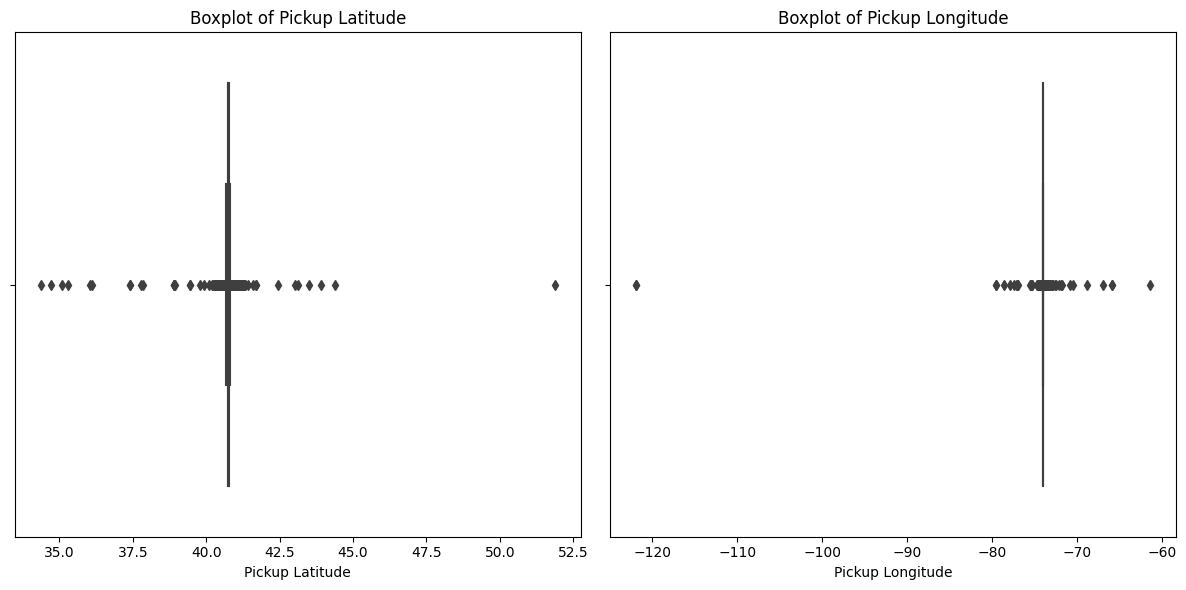

In [13]:
#DATA EXPLORATION
print("Train dataset is shown below:")
print(trainingData.head())

# Display the first few rows of the test dataset
print("\nTest dataset is shown below:")
print(data_test.head())

# Summary statistics of the train dataset
print("\nSummary statistics of the train dataset is shown below:")
print(trainingData.describe())

# Summary statistics of the test dataset
print("\nSummary statistics of the test dataset is shown below:")
print(data_test.describe())

# Distribution of passenger counts
plt.figure(figsize=(8, 6))
sns.histplot(trainingData["passenger_count"], bins=range(1, 9), kde=False)
plt.xlabel("Passenger Count")
plt.ylabel("Frequency")
plt.title("Distribution of Passenger Counts")
plt.show()

# Missing values in the train dataset
print("\nMissing values in the train dataset is shown below:")
print(trainingData.isnull().sum())

# Missing values in the test dataset
print("\nMissing values in the test dataset is shown below:")
print(data_test.isnull().sum())

# Outlier detection for trip duration
plt.figure(figsize=(8, 6))
sns.boxplot(trainingData["trip_duration"])
plt.xlabel("Trip Duration")
plt.title("Boxplot of Trip Duration")
plt.show()

# Outlier detection for latitude and longitude coordinates
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=trainingData["pickup_latitude"])
plt.xlabel("Pickup Latitude")
plt.title("Boxplot of Pickup Latitude")
plt.subplot(1, 2, 2)
sns.boxplot(x=trainingData["pickup_longitude"])
plt.xlabel("Pickup Longitude")
plt.title("Boxplot of Pickup Longitude")
plt.tight_layout()
plt.show()

In [15]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the train and test datasets
trainingData = pd.read_csv("/content/drive/MyDrive/Capbl_project/train.csv")
data_test = pd.read_csv("/content/drive/MyDrive/Capbl_project/test.csv")

# Preprocess the data (handling missing values, scaling, encoding) - Use your own data preprocessing code here

# Convert 'pickup_datetime' to pandas datetime objects
trainingData['pickup_datetime'] = pd.to_datetime(trainingData['pickup_datetime'])
data_test['pickup_datetime'] = pd.to_datetime(data_test['pickup_datetime'])

# Extract features from 'pickup_datetime'
trainingData['pickup_hour'] = trainingData['pickup_datetime'].dt.hour
trainingData['pickup_dayofweek'] = trainingData['pickup_datetime'].dt.dayofweek

data_test['pickup_hour'] = data_test['pickup_datetime'].dt.hour
data_test['pickup_dayofweek'] = data_test['pickup_datetime'].dt.dayofweek

# Drop unnecessary columns and encode 'store_and_fwd_flag'
trainingData['store_and_fwd_flag'] = trainingData['store_and_fwd_flag'].map({'N': 0, 'Y': 1})
data_test['store_and_fwd_flag'] = data_test['store_and_fwd_flag'].map({'N': 0, 'Y': 1})

# Split the train data into features and target variable
train_features = trainingData.drop(['trip_duration', 'id', 'pickup_datetime', 'dropoff_datetime'], axis=1)
train_target = trainingData['trip_duration']

# Train the XGBoost Regression model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(train_features, train_target)

# Make predictions on the test set
test_predictions = xgb_model.predict(data_test.drop(['id', 'pickup_datetime'], axis=1))

# Prepare the predictions for submission
submission = pd.DataFrame({'id': data_test['id'], 'trip_duration': test_predictions})

# Save the predictions to a CSV file
submission.to_csv('predictions.csv', index=False)

# Print the predicted total ride duration for each ride in the test dataset
for idx, row in submission.iterrows():
    print(f"Ride ID: {row['id']}, Predicted Trip Duration: {row['trip_duration']:.2f} seconds")


Streaming output truncated to the last 5000 lines.
Ride ID: id3126847, Predicted Trip Duration: 398.76 seconds
Ride ID: id1945675, Predicted Trip Duration: 1253.46 seconds
Ride ID: id3993406, Predicted Trip Duration: 1289.83 seconds
Ride ID: id1219469, Predicted Trip Duration: 923.54 seconds
Ride ID: id2809365, Predicted Trip Duration: 439.61 seconds
Ride ID: id3794995, Predicted Trip Duration: 842.07 seconds
Ride ID: id2961917, Predicted Trip Duration: 414.24 seconds
Ride ID: id3530304, Predicted Trip Duration: 650.46 seconds
Ride ID: id2090491, Predicted Trip Duration: 535.19 seconds
Ride ID: id1129724, Predicted Trip Duration: 915.52 seconds
Ride ID: id1612666, Predicted Trip Duration: 2030.92 seconds
Ride ID: id2725492, Predicted Trip Duration: 2143.27 seconds
Ride ID: id1301170, Predicted Trip Duration: 511.53 seconds
Ride ID: id3465318, Predicted Trip Duration: 846.99 seconds
Ride ID: id1139980, Predicted Trip Duration: 852.76 seconds
Ride ID: id3005066, Predicted Trip Duration: 

In [16]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the train and test datasets
trainingData = pd.read_csv("/content/drive/MyDrive/Capbl_project/train.csv")
data_test = pd.read_csv("/content/drive/MyDrive/Capbl_project/test.csv")

# Preprocess the data (handling missing values, scaling, encoding) - Use your own data preprocessing code here

# Convert 'pickup_datetime' to pandas datetime objects
trainingData['pickup_datetime'] = pd.to_datetime(trainingData['pickup_datetime'])
data_test['pickup_datetime'] = pd.to_datetime(data_test['pickup_datetime'])

# Extract features from 'pickup_datetime'
trainingData['pickup_hour'] = trainingData['pickup_datetime'].dt.hour
trainingData['pickup_dayofweek'] = trainingData['pickup_datetime'].dt.dayofweek

data_test['pickup_hour'] = data_test['pickup_datetime'].dt.hour
data_test['pickup_dayofweek'] = data_test['pickup_datetime'].dt.dayofweek

# Drop unnecessary columns and encode 'store_and_fwd_flag'
trainingData['store_and_fwd_flag'] = trainingData['store_and_fwd_flag'].map({'N': 0, 'Y': 1})
data_test['store_and_fwd_flag'] = data_test['store_and_fwd_flag'].map({'N': 0, 'Y': 1})

# Split the train data into features and target variable
train_features = trainingData.drop(['trip_duration', 'id', 'pickup_datetime', 'dropoff_datetime'], axis=1)
train_target = trainingData['trip_duration']

# Split the train data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_features, train_target, test_size=0.2, random_state=42)

# Train the XGBoost Regression model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the validation set
val_predictions = xgb_model.predict(X_val)

# Evaluate the model's performance on the validation set
rmse = sqrt(mean_squared_error(y_val, val_predictions))
print("Root Mean Squared Error (RMSE) on validation set:", rmse)

# Make predictions on the test set
test_predictions = xgb_model.predict(data_test.drop(['id', 'pickup_datetime'], axis=1))

# Prepare the predictions for submission
submission = pd.DataFrame({'id': data_test['id'], 'trip_duration': test_predictions})

# Save the predictions to a CSV file
submission.to_csv('predictions.csv', index=False)


Root Mean Squared Error (RMSE) on validation set: 3814.1014494026213


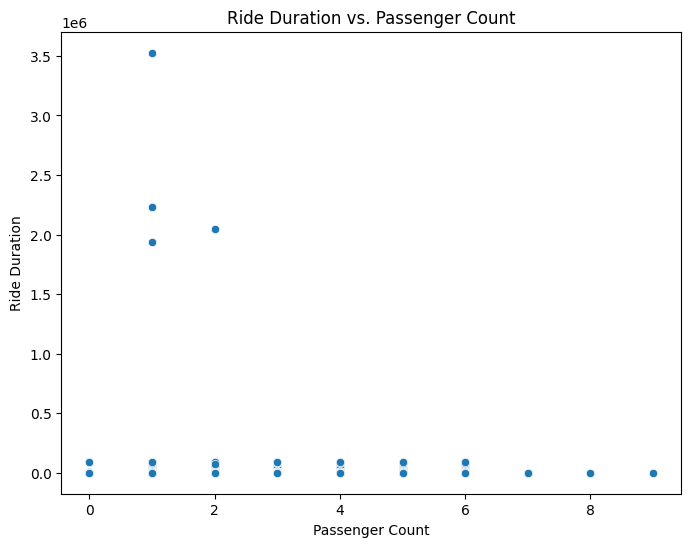

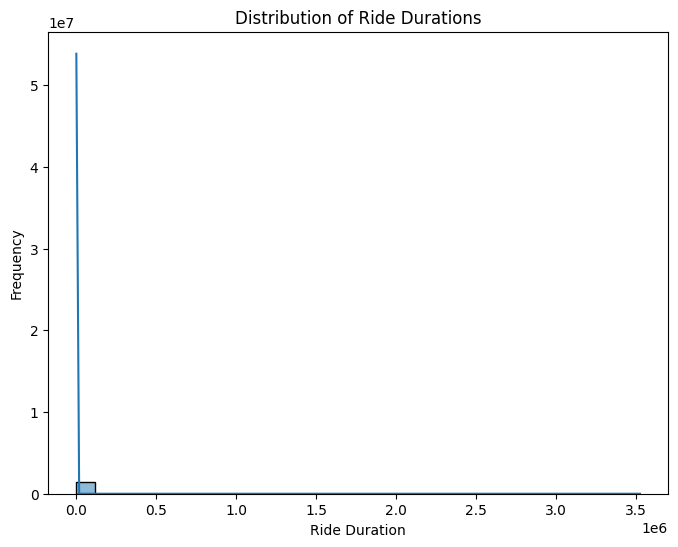

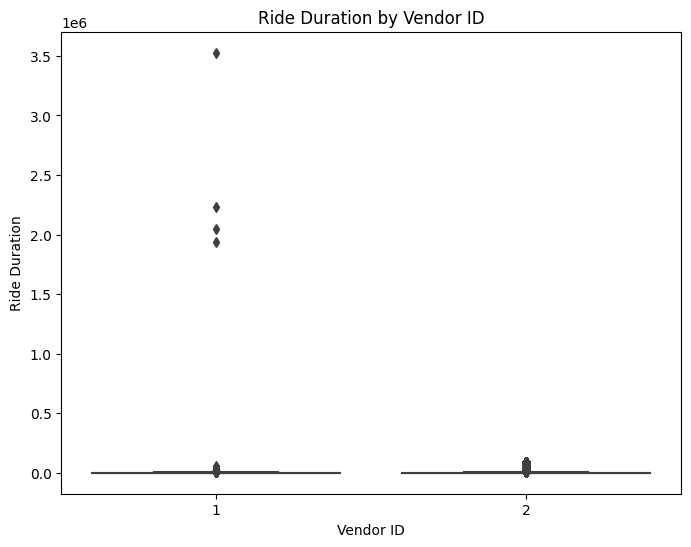

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the train dataset
trainingData = pd.read_csv("/content/drive/MyDrive/Capbl_project/train.csv")

# Scatterplot: Ride Duration vs. Passenger Count
plt.figure(figsize=(8, 6))
sns.scatterplot(x=trainingData["passenger_count"], y=trainingData["trip_duration"])
plt.xlabel("Passenger Count")
plt.ylabel("Ride Duration")
plt.title("Ride Duration vs. Passenger Count")
plt.show()

# Histogram: Distribution of Ride Durations
plt.figure(figsize=(8, 6))
sns.histplot(trainingData["trip_duration"], bins=30, kde=True)
plt.xlabel("Ride Duration")
plt.ylabel("Frequency")
plt.title("Distribution of Ride Durations")
plt.show()

# Boxplot: Ride Duration by Vendor ID
plt.figure(figsize=(8, 6))
sns.boxplot(x=trainingData["vendor_id"], y=trainingData["trip_duration"])
plt.xlabel("Vendor ID")
plt.ylabel("Ride Duration")
plt.title("Ride Duration by Vendor ID")
plt.show()
